In [19]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

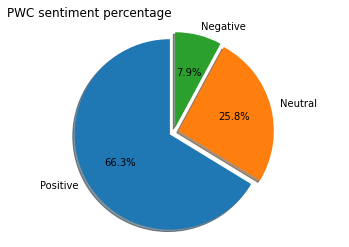

In [29]:
pd1=pd.read_csv("PWC_COVID.csv")
#pd2=pd.read_csv("Deloitte_COVID.csv")
#pd3=pd.read_csv("KPMG_COVID.csv")
#pd4=pd.read_csv("PWC_COVID.csv")
pos=0
neutral=0
neg=0


def sent(pdf):
    idx=0
    for i in range(0, len(pdf["Text"].tolist())):
        m=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",pdf["Text"][idx]).split())
        #for i in range(0, len(m)):
        analysis = TextBlob(m)
        if analysis.sentiment.polarity > 0:
            pdf.at[idx,"sentiment"]=1 

        elif analysis.sentiment.polarity == 0:
            pdf.at[idx,"sentiment"]=0

        else:
            pdf.at[idx,"sentiment"]=-1

        idx+=1

sent(pd1)

yr=pd1["sentiment"].tolist()
for i in yr:

    if np.int(i)==1:
        pos+=1
    if np.int(i)==0:
        neutral+=1
    if np.int(i)==-1:
        neg+=1

#for j in range(0, len(eng)):
    #eng[j]=eng[j]//3
"""""    
for i in range(0, len(yr)):
    h=yr[i]
    z=int(h[5:7])
    if not pd.isna(pd4["commentCount"][i]):
        eng[z-1]+=np.int(pd4["commentCount"][i])
    if not pd.isna(pd4["retweetCount"][i]):
        eng[z-1]+=np.int(pd4["retweetCount"][i])
    if not pd.isna(pd4["likeCount"][i]):
        eng[z-1]+=np.int(pd4["likeCount"][i])
    if pd4["sentiment"][i]==1.0:
        pos[z-1]+=1
    if pd4["sentiment"][i]==-1.0:
        neg[z-1]+=1
    if pd4["sentiment"][i]==0.0:
        neutral[z-1]+=1
#for j in range(0, len(eng)):
    #eng[j]=eng[j]//3
"""""

labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neutral, neg]
explode = (0.05, 0.05, 0.05)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
label="PWC sentiment percentage"
plt.title(label, fontdict=None, loc='left', pad=None)
plt.show()

    
    
